# Credit Card Approval Prediction Using Stacked Ensemble Learning #

## Preprocessing and Exploratory Data Analysis ##

### Importing Packages ###

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Importing Data ##

In [5]:
application_details = pd.read_csv('C:/Users/abhin/Desktop/NCI 2022/DMML1/datasetsand project semester/Final Submission DMML/Credit card UC Datasets/Approval pred/application_record.csv')
credit_record = pd.read_csv('C:/Users/abhin/Desktop/NCI 2022/DMML1/datasetsand project semester/Final Submission DMML/Credit card UC Datasets/Approval pred/credit_record.csv')

### Data Summary ###

In [6]:
application_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [12]:
application_details.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [13]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [14]:
credit_record.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1048575.0,5.068286e+06,46150.578505,5001711.0,5023644.0,5062104.0,5113856.0,5150487.0
MONTHS_BALANCE,1048575.0,-1.913700e+01,14.023498,-60.0,-29.0,-17.0,-7.0,0.0


### Checking Skewness ###

In [15]:
application_details.skew()

ID                  0.212718
CNT_CHILDREN        1.806941
AMT_INCOME_TOTAL    8.834066
DAYS_BIRTH         -0.160181
DAYS_EMPLOYED       1.739495
FLAG_MOBIL          0.000000
FLAG_WORK_PHONE     1.452898
FLAG_PHONE          0.937568
FLAG_EMAIL          2.522482
CNT_FAM_MEMBERS     0.919676
dtype: float64

In [16]:
credit_record.skew()

ID                0.163081
MONTHS_BALANCE   -0.620084
dtype: float64

### Count Plot of Categorical Features: application_details ##

In [17]:
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=application_details[feature], hue='CODE_GENDER' , data=application_details)
        plt.legend(loc='best')
        total = len(application_details[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

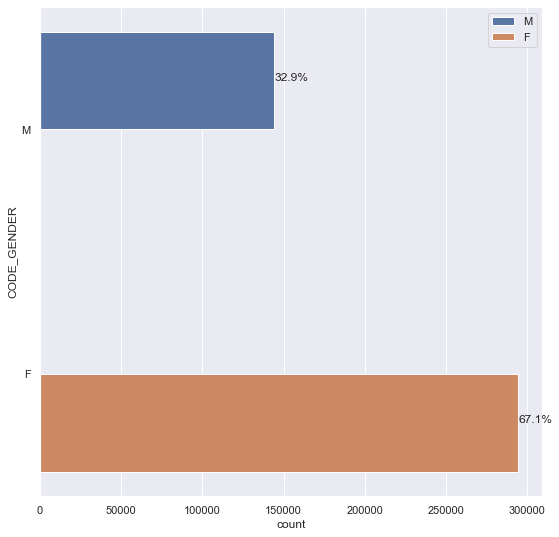

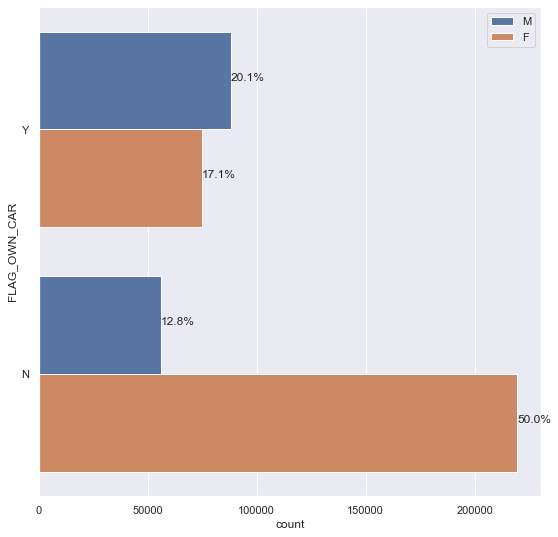

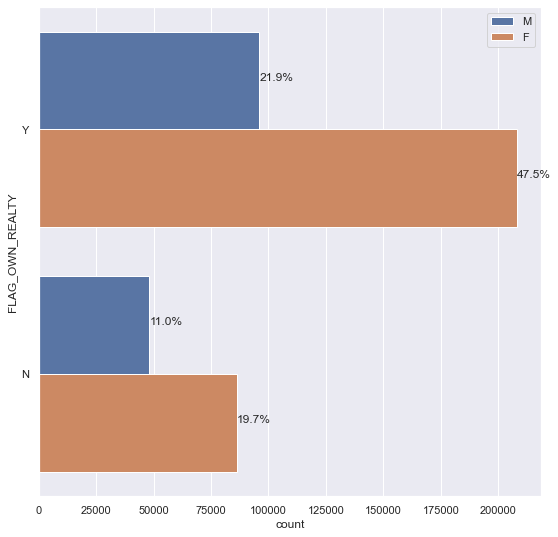

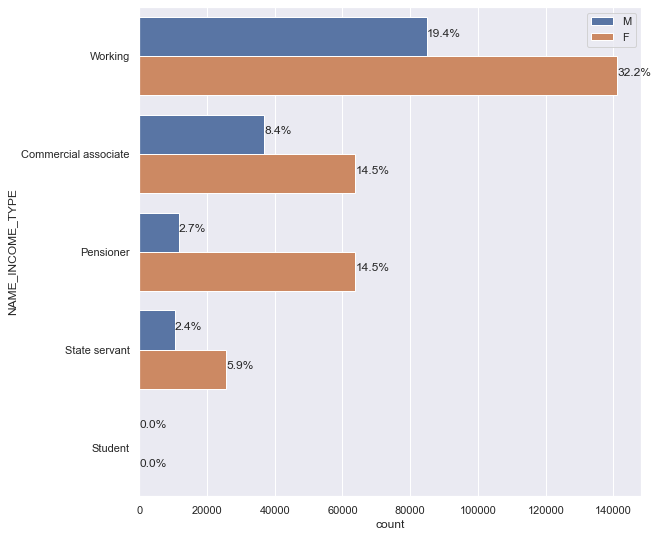

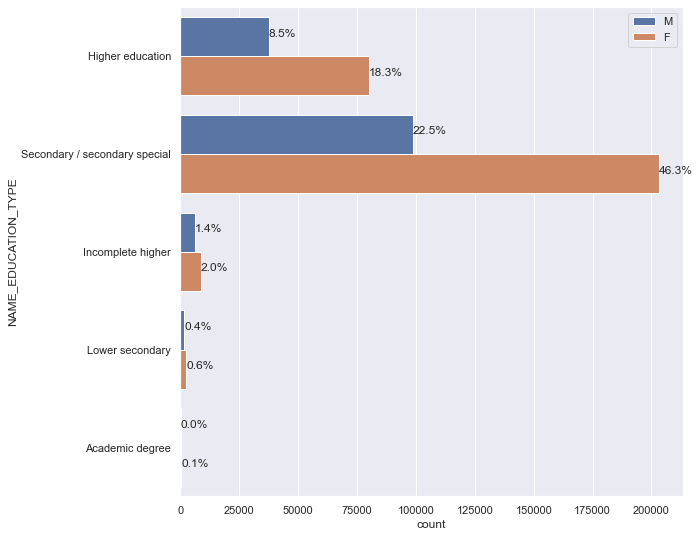

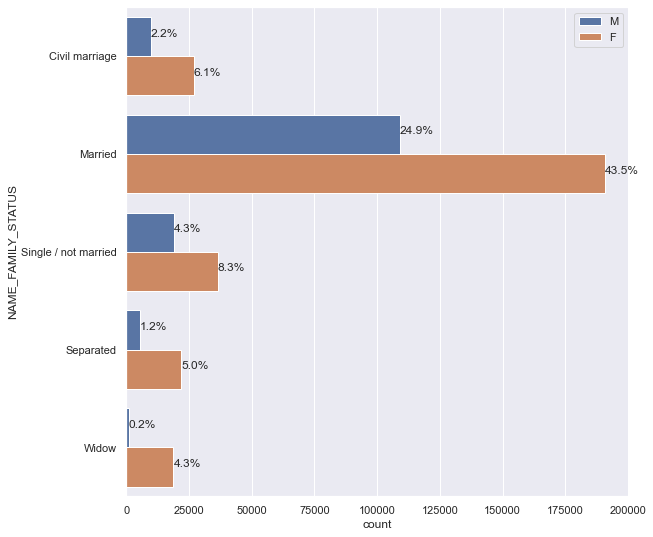

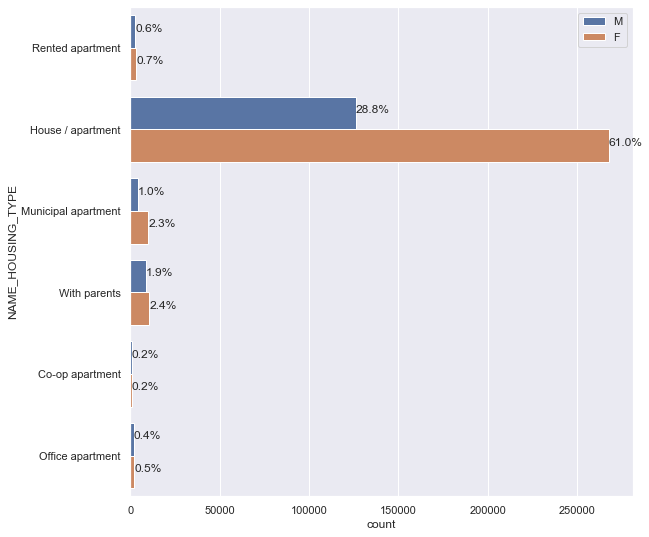

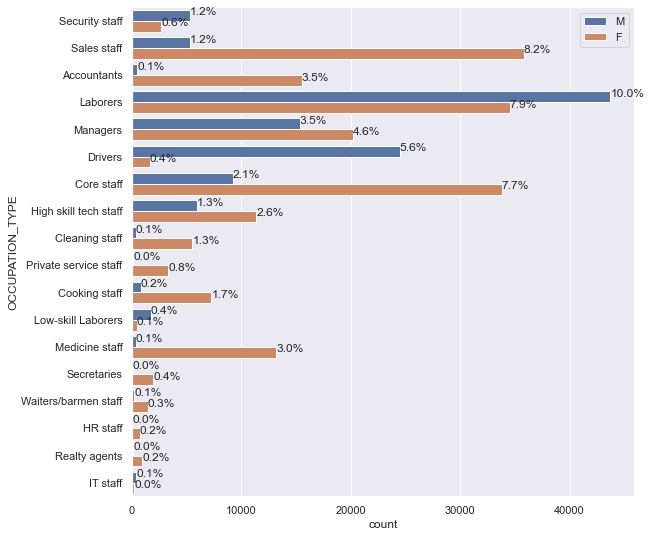

In [18]:
countplot_applicants(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])

  

### Count Plot of Categorical Features: credit_Record ##

In [19]:
def countplot_credit(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=credit_record[feature], data=credit_record)
        total = len(credit_record[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

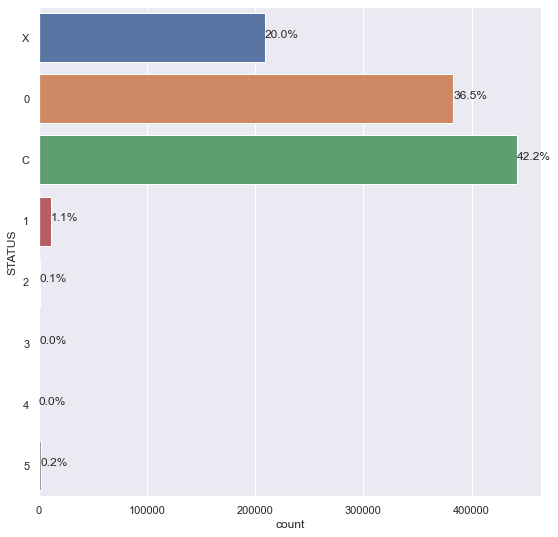

In [20]:
countplot_credit(['STATUS'])

### Insights from the CountPlot Analysis: credit_record ###

C: loan for that month is already paid
X: no loan for that month
0: loan is 1 to 29 days overdue
1: loan is 30 to 59 days overdue
2: loan is 60 to 89 days overdue
3:loan is 90 to 119 days overdue
4: loan is 120 to 149 days overdue
5: loan is more than 150 days overdue

a. 20% of applicatnts does'nt have loan of the current month.
b. 36.5% of applicants have overdue for 1-29 days.
c. 42.2% of applicants already paid current month loan.
d. 1.1% of applicants have overdue for 30-59 days.
e. 0.1% of applicants have overdue for 60-89 days.
f. 0% of applicants have overdue for 90-119 days.
g. 0% of applicants have overdue for 120-149 days.
h. 0.2% of applicants have overdue for 150 days.

## Feature Engineering #

### Finding Missing Values: application_details ##

In [21]:
application_details.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

### CountPlot analysis occupation in terms of education ### 

In [22]:
def countplot_occupation(features):
    for feature in features:
        plt.figure(figsize=(25,25))
        ax=sns.countplot(y=application_details[feature], hue='NAME_EDUCATION_TYPE' , data=application_details)
        plt.legend(loc='best')
        total = len(application_details[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

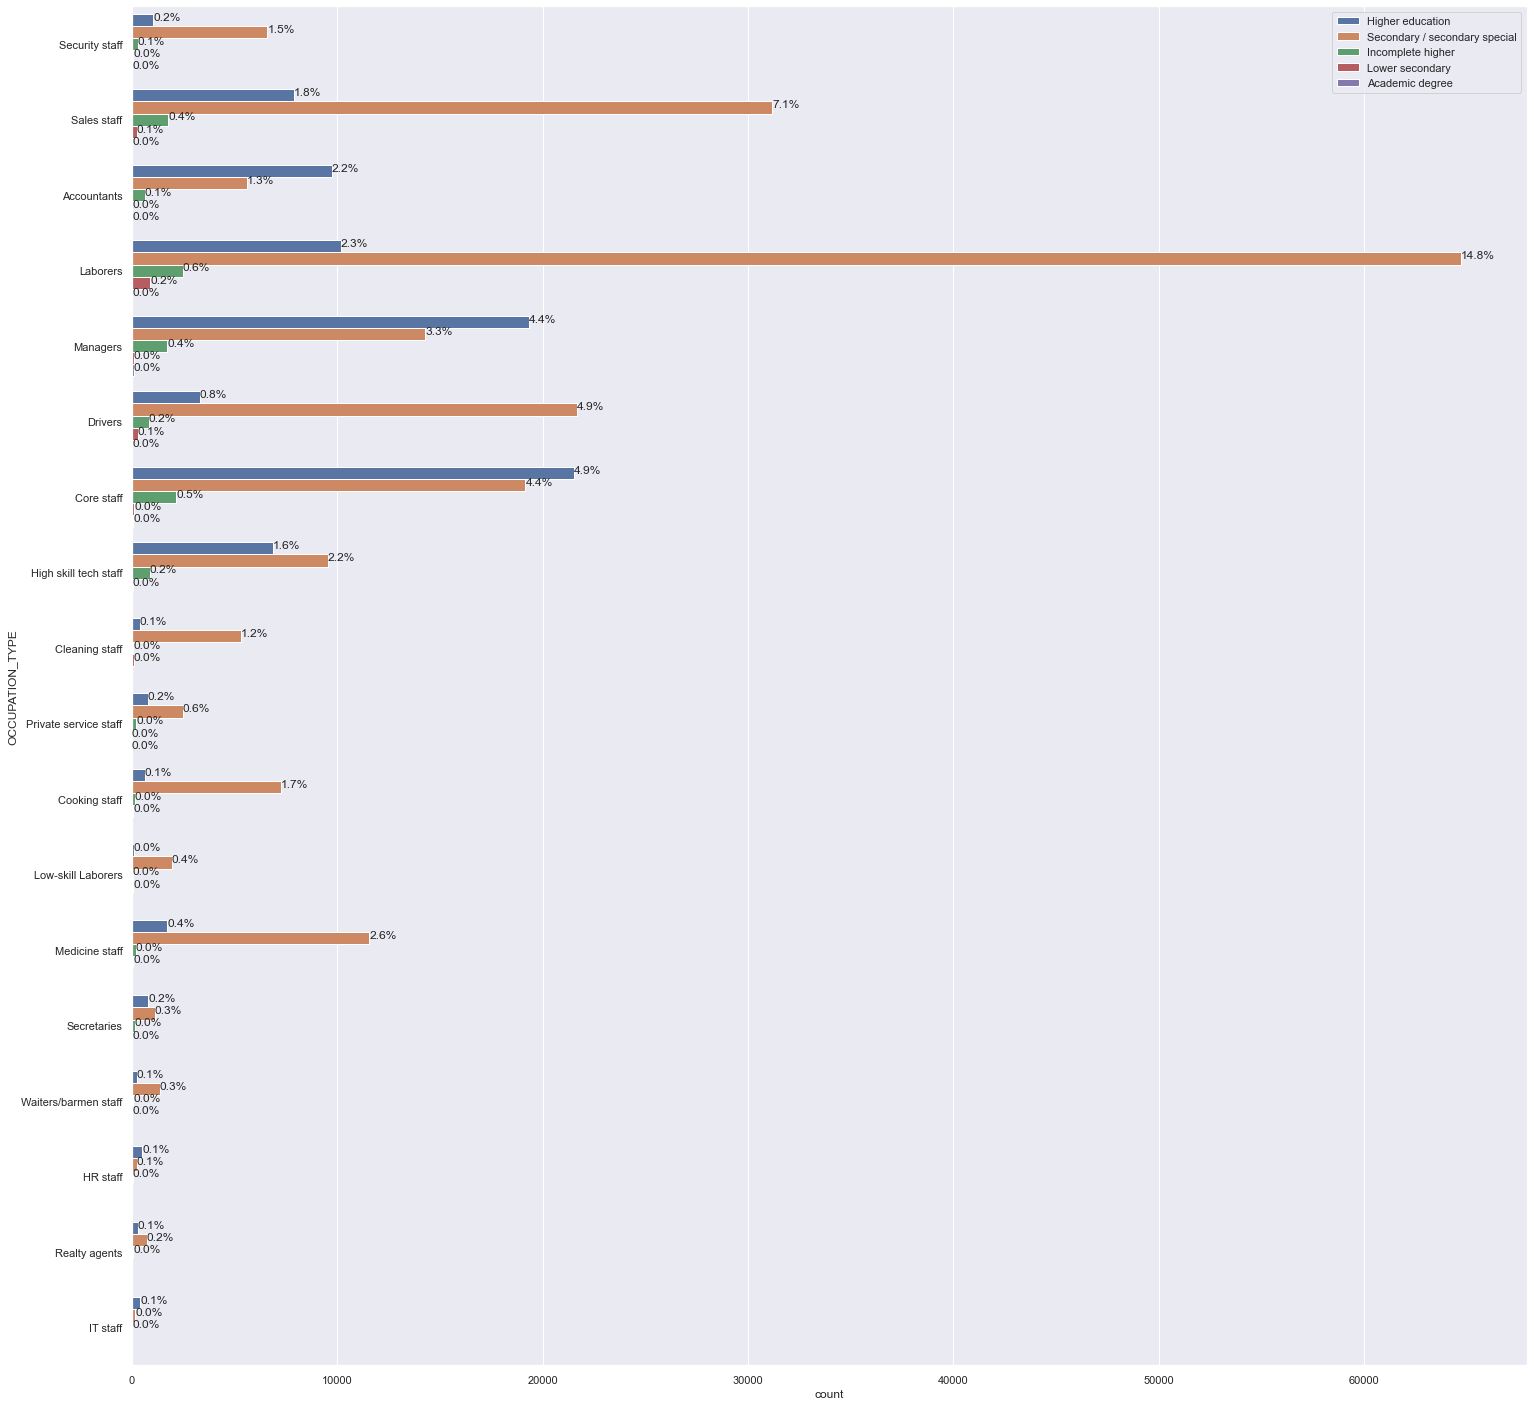

In [23]:
countplot_occupation(['OCCUPATION_TYPE'])

In [24]:
def occupation_by_education_by_gender(occupations, educations, genders, length):
    Gender = []
    Education = []
    Occupation = []
    Percentage = []
    for gender in genders:
        for education in educations:
            for occupation in occupations:
                Gender.append(gender)
                Education.append(education)
                Occupation.append(occupation)
                temp_df_1=application_details.loc[application_details['OCCUPATION_TYPE'] == occupation]
                temp_df_2=temp_df_1.loc[temp_df_1['CODE_GENDER'] == gender]
                temp_df_3=temp_df_2.loc[temp_df_2['NAME_EDUCATION_TYPE'] == education]
                length_filter = len(temp_df_3)
                Percentage.append(length_filter/length)
    percent_dict={
        'Gender': Gender,
        'Education': Education,
        'Occupation': Occupation,
        'Popularity Percentage': Percentage
    }
    df = pd.DataFrame(percent_dict)
    df.to_excel('Occupation_popularity_index.xlsx', index=False)
                
                
        

occupation_by_education_by_gender(list(application_details['OCCUPATION_TYPE'].unique()), list(application_details['NAME_EDUCATION_TYPE'].unique()), list(application_details['CODE_GENDER'].unique()), len(application_details))

occupation_popularity = pd.read_excel('Occupation_popularity_index.xlsx')

In [25]:
occupation_popularity.head()

,Gender,Education,Occupation,Popularity Percentage
0,M,Higher education,NaN,0.000000
1,M,Higher education,Security staff,0.001751
2,M,Higher education,Sales staff,0.004068
3,M,Higher education,Accountants,0.000869
4,M,Higher education,Laborers,0.013955


### Replacing blank 'OCCUPATION_TYPE' with most popular occupation ###

In [26]:
occupation_popularity['Tag'] = occupation_popularity['Gender']+ '_' + occupation_popularity['Education']

### Creating 'Tag' vs. popularity dictionary

In [27]:
def Dict(data):
    tag_list=list(data['Tag'].unique())
    popular_occupation = []
    data_grouped = data.groupby('Tag')
    for tag in tag_list:
        grouped_data = data_grouped.get_group(tag)
        popular_occupation.append(grouped_data.loc[grouped_data['Popularity Percentage'] == max(list(grouped_data['Popularity Percentage']))]['Occupation'].tolist()[0])
    Tag_dict={
        'Tag': tag_list,
        'Occupation': popular_occupation
    }
    return Tag_dict

dict_df = Dict(occupation_popularity)

pd.DataFrame(dict_df).to_excel('Tag_vs_Occupation.xlsx', index=False)

tag_data = pd.read_excel('Tag_vs_Occupation.xlsx')

In [28]:
tag_data

,Tag,Occupation
0,M_Higher education,Managers
1,M_Secondary / secondary special,Laborers
2,M_Incomplete higher,Laborers
3,M_Lower secondary,Laborers
4,M_Academic degree,Core staff
5,F_Higher education,Core staff
6,F_Secondary / secondary special,Laborers
7,F_Incomplete higher,Core staff
8,F_Lower secondary,Laborers
9,F_Academic degree,Managers


In [29]:
tag_g = list(tag_data['Tag'])
occu_g = list(tag_data['Occupation'])
tag_dict = {}
for index in range(len(tag_g)):
    tag_dict[tag_g[index]] = occu_g[index]

In [30]:
tag_dict

{'M_Higher education': 'Managers',
 'M_Secondary / secondary special': 'Laborers',
 'M_Incomplete higher': 'Laborers',
 'M_Lower secondary': 'Laborers',
 'M_Academic degree': 'Core staff',
 'F_Higher education': 'Core staff',
 'F_Secondary / secondary special': 'Laborers',
 'F_Incomplete higher': 'Core staff',
 'F_Lower secondary': 'Laborers',
 'F_Academic degree': 'Managers'}

In [31]:
application_details['Tag'] = application_details['CODE_GENDER']+ '_' + application_details['NAME_EDUCATION_TYPE']

### Imputing missing values

In [32]:
def Replace_nan_occupation(df):
    for key in tag_dict:
        if df['Tag'] == key and pd.isnull(df['OCCUPATION_TYPE']):
            df['OCCUPATION_TYPE'] = tag_dict[key]
    return df

In [33]:
len(application_details)

438557

In [34]:
application_details = application_details.apply(Replace_nan_occupation, axis=1)

In [35]:
len(application_details)

438557

In [36]:
application_details.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
Tag                    0
dtype: int64

In [37]:
application_details.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Tag
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Managers,2.0,M_Higher education
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Managers,2.0,M_Higher education
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,M_Secondary / secondary special
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,F_Secondary / secondary special
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,F_Secondary / secondary special


### Converting Days format features to readable format ##

In [38]:
application_details['AGE'] = np.ceil(pd.to_timedelta(application_details['DAYS_BIRTH'], unit='D').dt.days / -365.25)

In [39]:
application_details['AGE']

0         33.0
1         33.0
2         59.0
3         53.0
4         53.0
          ... 
438552    63.0
438553    44.0
438554    23.0
438555    60.0
438556    52.0
Name: AGE, Length: 438557, dtype: float64

In [40]:
application_details.drop('DAYS_BIRTH', axis=1, inplace=True)

In [41]:
application_details.loc[(application_details['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0
application_details['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(application_details['DAYS_EMPLOYED'], unit='D').dt.days / -365.25)

In [42]:
application_details['YEARS_EMPLOYED']

0         13.0
1         13.0
2          4.0
3          9.0
4          9.0
          ... 
438552    -0.0
438553     9.0
438554     2.0
438555    -0.0
438556     4.0
Name: YEARS_EMPLOYED, Length: 438557, dtype: float64

In [43]:
application_details.drop(['DAYS_EMPLOYED', 'Tag'], axis=1, inplace=True)

### Final Columns ###

In [44]:
application_details.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'AGE', 'YEARS_EMPLOYED'],
      dtype='object')

In [45]:
application_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  FLAG_MOBIL           438557 non-null  int64  
 11  FLAG_WORK_PHONE      438557 non-null  int64  
 12  FLAG_PHONE           438557 non-null  int64  
 13  FLAG_EMAIL           438557 non-null  int64  
 14  OCCUPATION_TYPE      438557 non-null  object 
 15  CNT_FAM_MEMBERS  

In [46]:
application_details.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Managers,2.0,33.0,13.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Managers,2.0,33.0,13.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,59.0,4.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,53.0,9.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,53.0,9.0


## Label Encoding Categorical Features to Numerical Values ##

#### Apllication_details data ###

In [47]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(application_details[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        application_details.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [48]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',\
                        'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', \
                        'NAME_EDUCATION_TYPE']
Cat_to_Num(categorical_features)

CODE_GENDER --> {'F': 0, 'M': 1}
FLAG_OWN_CAR --> {'N': 0, 'Y': 1}
FLAG_OWN_REALTY --> {'N': 0, 'Y': 1}
NAME_INCOME_TYPE --> {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_FAMILY_STATUS --> {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
OCCUPATION_TYPE --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17}
NAME_HOUSING_TYPE --> {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
NAME_EDUCATION_TYPE --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Seconda

In [49]:
application_details.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59.0,4.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0


### Credit_record data ###

In [50]:
convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt',\
              '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', \
              '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
credit_record.replace({'STATUS' : convert_to}, inplace=True)

In [51]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


### Counting the number of debts ###

In [52]:
credit_record = credit_record.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)

In [53]:
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0
...,...,...,...
5150482,0,18,0
5150483,0,18,0
5150484,0,13,0


### Creating Credit Approval Status ##

In [54]:
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit_record.loc[(credit_record['Neutral_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit_record.loc[(credit_record['Bad_Debt'] > credit_record['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0

In [55]:
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1.0
5001712,0,19,0,1.0
5001713,0,22,0,1.0
5001714,0,15,0,1.0
5001715,0,60,0,1.0
...,...,...,...,...
5150482,0,18,0,1.0
5150483,0,18,0,1.0
5150484,0,13,0,1.0


In [56]:
np.unique(credit_record['CREDIT_APPROVAL_STATUS'])

array([0., 1.])

In [57]:
credit_record['CREDIT_APPROVAL_STATUS'] = credit_record['CREDIT_APPROVAL_STATUS'].astype('int')

In [58]:
credit_record

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1
5001712,0,19,0,1
5001713,0,22,0,1
5001714,0,15,0,1
5001715,0,60,0,1
...,...,...,...,...
5150482,0,18,0,1
5150483,0,18,0,1
5150484,0,13,0,1


In [59]:
credit_record.drop(['Bad_Debt', 'Good_Debt', 'Neutral_Debt'], axis=1, inplace=True)

In [60]:
credit_record

STATUS,CREDIT_APPROVAL_STATUS
ID,
5001711,1
5001712,1
5001713,1
5001714,1
5001715,1
...,...
5150482,1
5150483,1
5150484,1


## Merging Both application_details and credit_record data #

In [61]:
Final_Credit_data = application_details.merge(credit_record, how='inner', on=['ID'])

In [62]:
Final_Credit_data.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_APPROVAL_STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59.0,4.0,1
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
5,5008810,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
6,5008811,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
7,5008812,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0,1
8,5008813,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0,1
9,5008814,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,3,1.0,62.0,-0.0,1


In [63]:
credit_approval_data = Final_Credit_data.drop('ID', axis=1, inplace=False)

In [64]:
credit_approval_data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_APPROVAL_STATUS
0,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
1,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1
2,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59.0,4.0,1
3,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
4,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,315000.0,4,4,1,1,1,0,0,0,10,2.0,48.0,7.0,0
36453,0,0,1,0,157500.0,0,1,1,1,1,0,1,1,11,2.0,34.0,4.0,0
36454,0,0,1,0,157500.0,1,1,1,1,1,0,1,1,11,2.0,34.0,4.0,1
36455,0,0,1,0,283500.0,4,4,1,1,1,0,0,0,14,2.0,50.0,2.0,1


In [65]:
credit_approval_data['CREDIT_APPROVAL_STATUS'].value_counts()

1    36281
0      176
Name: CREDIT_APPROVAL_STATUS, dtype: int64

This shows that there is still a problem of Class imbalance (Minority clas 0.48 % only) as using this dataset may bias our prediction towards the approval :1 class more than towards the approval:0 class because of sheer difference in the class representation in our dataset. Hence, addressing this problem becomes a priority.   

In [66]:
credit_approval_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CODE_GENDER,36457.0,0.329895,0.470181,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_CAR,36457.0,0.379708,0.485321,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,36457.0,0.672189,0.469422,0.0,0.0,1.0,1.0,1.0
CNT_CHILDREN,36457.0,0.430315,0.742367,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,186685.736662,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
NAME_INCOME_TYPE,36457.0,2.398195,1.734032,0.0,1.0,4.0,4.0,4.0
NAME_EDUCATION_TYPE,36457.0,3.097183,1.341292,0.0,1.0,4.0,4.0,4.0
NAME_FAMILY_STATUS,36457.0,1.367885,0.954557,0.0,1.0,1.0,1.0,4.0
NAME_HOUSING_TYPE,36457.0,1.282881,0.951675,0.0,1.0,1.0,1.0,5.0
FLAG_MOBIL,36457.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [67]:
credit_approval_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CODE_GENDER             36457 non-null  int64  
 1   FLAG_OWN_CAR            36457 non-null  int64  
 2   FLAG_OWN_REALTY         36457 non-null  int64  
 3   CNT_CHILDREN            36457 non-null  int64  
 4   AMT_INCOME_TOTAL        36457 non-null  float64
 5   NAME_INCOME_TYPE        36457 non-null  int64  
 6   NAME_EDUCATION_TYPE     36457 non-null  int64  
 7   NAME_FAMILY_STATUS      36457 non-null  int64  
 8   NAME_HOUSING_TYPE       36457 non-null  int64  
 9   FLAG_MOBIL              36457 non-null  int64  
 10  FLAG_WORK_PHONE         36457 non-null  int64  
 11  FLAG_PHONE              36457 non-null  int64  
 12  FLAG_EMAIL              36457 non-null  int64  
 13  OCCUPATION_TYPE         36457 non-null  int64  
 14  CNT_FAM_MEMBERS         36457 non-null

### Feature Scaling for undue variance in income and age features when compared to others

In [68]:
from sklearn.preprocessing import MinMaxScaler
income = np.array(credit_approval_data['AMT_INCOME_TOTAL']).reshape(-1,1)
age = np.array(credit_approval_data['AGE']).reshape(-1,1)
scaler = MinMaxScaler()

scaler.fit(income)
income_scaled = scaler.transform(income)

scaler.fit(age)
age_scaled = scaler.transform(age)

In [69]:
credit_approval_data['Scaled Income'] = income_scaled.reshape(1,-1)[0]
credit_approval_data['Scaled Age'] = age_scaled.reshape(1,-1)[0]

In [70]:
credit_approval_data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CREDIT_APPROVAL_STATUS,Scaled Income,Scaled Age
0,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1,0.258721,0.250000
1,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,10,2.0,33.0,13.0,1,0.258721,0.250000
2,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,59.0,4.0,1,0.055233,0.791667
3,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1,0.156977,0.666667
4,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,53.0,9.0,1,0.156977,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,315000.0,4,4,1,1,1,0,0,0,10,2.0,48.0,7.0,0,0.186047,0.562500
36453,0,0,1,0,157500.0,0,1,1,1,1,0,1,1,11,2.0,34.0,4.0,0,0.084302,0.270833
36454,0,0,1,0,157500.0,1,1,1,1,1,0,1,1,11,2.0,34.0,4.0,1,0.084302,0.270833
36455,0,0,1,0,283500.0,4,4,1,1,1,0,0,0,14,2.0,50.0,2.0,1,0.165698,0.604167


In [71]:
credit_approval_data.drop(['AMT_INCOME_TOTAL','AGE'], axis=1, inplace=True)

## Splitting the credit_approval_data into training and testing sets using K-fold and Stratified K-fold Cross validation ##

In [72]:
from sklearn.model_selection import train_test_split, \
KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, cross_validate

In [73]:
X = credit_approval_data.drop('CREDIT_APPROVAL_STATUS', axis=1)
y = credit_approval_data['CREDIT_APPROVAL_STATUS']

In [74]:
# Hold-out CV method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Creating Standalone Classification Models: DT, LR, SVM, NB, KNN, RF and XGB Model ##

In [75]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.svm import LinearSVC as SVC
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.ensemble import RandomForestClassifier as RF
from xgboost import XGBClassifier as XGB

In [76]:
model_DT = DT()
model_LR = LogReg()
model_SVC = SVC()
model_NB = NB()
model_KNN = Knn()
model_RF = RF()
model_Xgb = XGB()

### Training Model and Prediction #####

In [77]:
model_DT.fit(X_train, y_train)
model_LR.fit(X_train, y_train)
model_SVC.fit(X_train, y_train)
model_NB.fit(X_train, y_train)
model_KNN.fit(X_train, y_train)
model_RF.fit(X_train, y_train)
model_Xgb.fit(X_train, y_train)

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [78]:
y_pred_DT = model_DT.predict(X_test)
y_pred_LR = model_LR.predict(X_test)
y_pred_SVC = model_SVC.predict(X_test)
y_pred_NB = model_NB.predict(X_test)
y_pred_KNN = model_KNN.predict(X_test)
y_pred_RF = model_RF.predict(X_test)
y_pred_Xgb = model_Xgb.predict(X_test)

### Cross validation and Accuracy Scores ##

In [79]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

In [80]:
print('Accuracy DT: ' ,accuracy_score(y_test, y_pred_DT))
print('Accuracy LR: ' ,accuracy_score(y_test, y_pred_LR))
print('Accuracy SVC: ' ,accuracy_score(y_test, y_pred_SVC))
print('Accuracy NB: ' ,accuracy_score(y_test, y_pred_NB))
print('Accuracy KNN: ' ,accuracy_score(y_test, y_pred_KNN))
print('Accuracy RF: ' ,accuracy_score(y_test, y_pred_RF))
print('Accuracy Xgb: ' ,accuracy_score(y_test, y_pred_Xgb))

Accuracy DT:  0.9937831413421101
Accuracy LR:  0.9957944779667215
Accuracy SVC:  0.9957944779667215
Accuracy NB:  0.995154507222527
Accuracy KNN:  0.9955202047906382
Accuracy RF:  0.9956116291826659
Accuracy Xgb:  0.9957944779667215


In [81]:
my_models = {'DT':model_DT, 'LogReg':model_LR, 'SVC':model_SVC, 'NB':model_NB, 'KNN':model_KNN,\
             'RF':model_RF, 'Xgb':model_Xgb}

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
# %%time

# # Not recommended for quick review as computationally intensive

## Cross validated Accuracy Scores using cross_val_score function
# for key, model in my_models.items():
#   # K-fold CV score
#     kfs = KFold(n_splits= 10, shuffle= True, random_state= 21)
#     kf_scores = cross_val_score(model, X, y, cv=kfs) # cv is k-folds
#     # print(kf_scores)
#     print( "Mean KFold Accuracy %s: "%key, kf_scores.mean())

#     # Stratified K-fold CV score
#     skf = StratifiedKFold(10,shuffle=True, random_state= 21)
#     skf_scores = cross_val_score(model, X, y, cv=skf) # cv is sk-folds
#     # print(skf_scores)
#     print( "Mean Stratified Kfold Accuracy %s: "%key, skf_scores.mean())
#     print('\n')

Mean KFold Accuracy DT:  0.993279735313217
Mean Stratified Kfold Accuracy DT:  0.9935815110533219


Mean KFold Accuracy LogReg:  0.9951724008195839
Mean Stratified Kfold Accuracy LogReg:  0.9951724083442253


Mean KFold Accuracy SVC:  0.9951724008195839
Mean Stratified Kfold Accuracy SVC:  0.9951724083442253


Mean KFold Accuracy NB:  0.9939654859751972
Mean Stratified Kfold Accuracy NB:  0.9940752704920438


Mean KFold Accuracy KNN:  0.9948158306413928
Mean Stratified Kfold Accuracy KNN:  0.99467868652871


Mean KFold Accuracy RF:  0.9945689020118633
Mean Stratified Kfold Accuracy RF:  0.9944043832540613


Mean KFold Accuracy Xgb:  0.9945689095365046
Mean Stratified Kfold Accuracy Xgb:  0.9948706702273269


Wall time: 2min 59s


In [85]:
# %%time
# # Not recommended for quick review as computationally intensive

# # Gives Cross validated Precision, Recall, fit time scores on the Unsampled data using cross_validate function  \
# # using K-fold CV for all the 7 models

# for key,model in my_models.items():
#     print("\nFor model: ", key)
#     scoring = ['precision_macro', 'recall_macro']
#     # clf = svm.SVC(kernel='linear', C=1, random_state=0)
#     scores = cross_validate(model, X, y, scoring=scoring,cv=kfs, return_train_score=True)

#     # sorted(scores.keys())
#     for key, value in scores.items():
#         print('Mean '+ key+ ' ', value.mean())
    


For model:  DT
Mean fit_time  0.06586239337921143
Mean score_time  0.0037860631942749023
Mean test_precision_macro  0.6440300758872923
Mean train_precision_macro  0.8679095887848737
Mean test_recall_macro  0.6301026408745096
Mean train_recall_macro  0.823190415687472

For model:  LogReg
Mean fit_time  0.21643226146697997
Mean score_time  0.005531454086303711
Mean test_precision_macro  0.49758620040979196
Mean train_precision_macro  0.49758619747476107
Mean test_recall_macro  0.5
Mean train_recall_macro  0.5

For model:  SVC
Mean fit_time  4.30662305355072
Mean score_time  0.003975057601928711
Mean test_precision_macro  0.49758620040979196
Mean train_precision_macro  0.49758619747476107
Mean test_recall_macro  0.5
Mean train_recall_macro  0.5

For model:  NB
Mean fit_time  0.017104101181030274
Mean score_time  0.0049896240234375
Mean test_precision_macro  0.4975833222483056
Mean train_precision_macro  0.4975834212725757
Mean test_recall_macro  0.49939365396032914
Mean train_recall_macr

## Stacking Ensemble Technique (DT, LR, SVM, NB)

In [96]:
# model_DT = DT()
# model_LR = LogReg()
# model_SVC = SVC()
# model_NB = NB()
# model_KNN = Knn()
# model_RF = RF()
# model_Xgb = XGB()
my_models.keys()

dict_keys(['DT', 'LogReg', 'SVC', 'NB'])

In [97]:
# get the models to evaluate
# my_models_lv0.pop('NB')
my_models.pop('KNN')
my_models.pop('RF')
my_models.pop('Xgb')
my_models

KeyError: 'KNN'

In [98]:
from numpy import mean
from numpy import std
from sklearn.ensemble import StackingClassifier

# get a stacking ensemble of models lv1 :LogReg
def get_stackingLR(my_models_lv0):
    # define the base models

    level0 = list(my_models_lv0.items())

    # define meta learner model
    level1 = LogReg()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=21)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

### Iteration 1 for Stacked Model: lv0: (DT, LogReg, SVC, NB) and lv1: LogReg

In [69]:
stacked_LR1 = get_stackingLR(my_models)

In [70]:
stacked_LR1

StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression()),
                               ('SVC', LinearSVC()), ('NB', GaussianNB())],
                   final_estimator=LogisticRegression())

In [71]:
%%time
# Model Evaluation for Iter1

scores = evaluate_model(stacked_LR1, X, y)

print('\n%s Accuracy:  %.3f (%.3f)' % (stacked_LR1, mean(scores), std(scores)))


StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression()),
                               ('SVC', LinearSVC()), ('NB', GaussianNB())],
                   final_estimator=LogisticRegression()) Accuracy:  0.995 (0.000)
Wall time: 2min 22s


### Iteration 2 for Stacked Model: lv0: (DT, LogReg, SVC) and lv1: LogReg

In [72]:
# Model selection and evaluation
input_models = {'DT':model_DT, 'LogReg':model_LR, 'SVC':model_SVC}
stacked_LR2 = get_stackingLR(input_models)
stacked_LR2

StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression()),
                               ('SVC', LinearSVC())],
                   final_estimator=LogisticRegression())

In [73]:
%%time
scores = evaluate_model(stacked_LR2, X, y)

print('\n%s Accuracy:  %.3f (%.3f)' % (stacked_LR2, mean(scores), std(scores)))


StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression()),
                               ('SVC', LinearSVC())],
                   final_estimator=LogisticRegression()) Accuracy:  0.995 (0.000)
Wall time: 2min 23s


### Iteration 3 for Stacked Model: lv0: (DT, LogReg) and lv1: LogReg

In [74]:
# Model selection and evaluation
input_models = {'DT':model_DT, 'LogReg':model_LR}
stacked_LR3 = get_stackingLR(input_models)
stacked_LR3

StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [75]:
%%time
scores = evaluate_model(stacked_LR3, X, y)

print('\n%s Accuracy:  %.3f (%.3f)' % (stacked_LR3, mean(scores), std(scores)))


StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression())],
                   final_estimator=LogisticRegression()) Accuracy:  0.995 (0.000)
Wall time: 6.61 s


### Iteration 4 for Stacked Model: lv0: (SVC, NB) and lv1: LogReg

In [56]:
# Model selection and evaluation
input_models = {'SVC':model_SVC, 'NB':model_NB}
stacked_LR4 = get_stackingLR(input_models)
stacked_LR4

StackingClassifier(cv=5,
                   estimators=[('SVC', LinearSVC()), ('NB', GaussianNB())],
                   final_estimator=LogisticRegression())

In [57]:
%%time
scores = evaluate_model(stacked_LR4, X, y)

print('\n%s Accuracy:  %.3f (%.3f)' % (stacked_LR4, mean(scores), std(scores)))


StackingClassifier(cv=5,
                   estimators=[('SVC', LinearSVC()), ('NB', GaussianNB())],
                   final_estimator=LogisticRegression()) Accuracy:  0.995 (0.000)
Wall time: 3min 36s


### Iteration 5 for Stacked Model: lv0: (DT, LogReg, NB) and lv1: LogReg

In [99]:
# Model selection and evaluation
input_models = {'LogReg': model_LR,'DT':model_DT, 'NB':model_NB}
stacked_LR5 = get_stackingLR(input_models)
stacked_LR5

StackingClassifier(cv=5,
                   estimators=[('LogReg', LogisticRegression()),
                               ('DT', DecisionTreeClassifier()),
                               ('NB', GaussianNB())],
                   final_estimator=LogisticRegression())

In [100]:
%%time
scores = evaluate_model(stacked_LR5, X, y)

print('\n%s Accuracy:  %.3f (%.3f)' % (stacked_LR5, mean(scores), std(scores)))


StackingClassifier(cv=5,
                   estimators=[('LogReg', LogisticRegression()),
                               ('DT', DecisionTreeClassifier()),
                               ('NB', GaussianNB())],
                   final_estimator=LogisticRegression()) Accuracy:  0.995 (0.000)
Wall time: 10.9 s


### Iteration 6 for Stacked Model: lv0: (DT, LogReg, SVC, NB) and lv1: DT

In [92]:
# get a stacking ensemble of models lv1 :DT
def get_stackingDT(my_models_lv0):
    
    # define the base models

    level0 = list(my_models_lv0.items())

    # define meta learner model
    level1 = DT()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=21)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


In [63]:
# Base Models selection and evaluation
input_models = {'DT':model_DT, 'LogReg':model_LR, 'SVC':model_SVC, 'NB':model_NB}
stacked_DT1 = get_stackingDT(input_models)
stacked_DT1

StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression()),
                               ('SVC', LinearSVC()), ('NB', GaussianNB())],
                   final_estimator=DecisionTreeClassifier())

In [64]:
%%time
scores = evaluate_model(stacked_DT1, X, y)

print('\n%s Accuracy:  %.3f (%.3f)' % (stacked_DT1, mean(scores), std(scores)))


StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression()),
                               ('SVC', LinearSVC()), ('NB', GaussianNB())],
                   final_estimator=DecisionTreeClassifier()) Accuracy:  0.981 (0.014)
Wall time: 3min 42s


### Iteration 7 for Stacked Model: lv0: (DT, LogReg, SVC) and lv1: DT

In [65]:
# Base Models selection and evaluation
input_models = {'DT':model_DT, 'LogReg':model_LR, 'SVC':model_SVC}
stacked_DT2 = get_stackingDT(input_models)
stacked_DT2

StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression()),
                               ('SVC', LinearSVC())],
                   final_estimator=DecisionTreeClassifier())

In [66]:
%%time
scores = evaluate_model(stacked_DT2, X, y)

print('\n%s Accuracy:  %.3f (%.3f)' % (stacked_DT2, mean(scores), std(scores)))


StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression()),
                               ('SVC', LinearSVC())],
                   final_estimator=DecisionTreeClassifier()) Accuracy:  0.984 (0.003)
Wall time: 3min 44s


### Iteration 8 for Stacked Model: lv0: (DT, LogReg) and lv1: DT

In [101]:
# Base Models selection and evaluation
input_models = {'DT':model_DT, 'LogReg':model_LR}
stacked_DT3 = get_stackingDT(input_models)
stacked_DT3

StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression())],
                   final_estimator=DecisionTreeClassifier())

In [102]:
%%time
scores = evaluate_model(stacked_DT3, X, y)

print('\n%s Accuracy:  %.5f (%.3f)' % (stacked_DT3, mean(scores), std(scores)))


StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression())],
                   final_estimator=DecisionTreeClassifier()) Accuracy:  0.98581 (0.002)
Wall time: 7.04 s


### Iteration 9 for Stacked Model: lv0: (SVC, LogReg) and lv1: DT

In [70]:
# Base Models selection and evaluation
input_models = {'SVC':model_SVC, 'LogReg':model_LR}
stacked_DT4 = get_stackingDT(input_models)
stacked_DT4

StackingClassifier(cv=5,
                   estimators=[('SVC', LinearSVC()),
                               ('LogReg', LogisticRegression())],
                   final_estimator=DecisionTreeClassifier())

In [71]:
%%time
scores = evaluate_model(stacked_DT4, X, y)

print('\n%s Accuracy:  %.5f (%.3f)' % (stacked_DT4, mean(scores), std(scores)))


StackingClassifier(cv=5,
                   estimators=[('SVC', LinearSVC()),
                               ('LogReg', LogisticRegression())],
                   final_estimator=DecisionTreeClassifier()) Accuracy:  0.98090 (0.011)
Wall time: 3min 38s


### Iteration 10 for Stacked Model: lv0: (DT, LogReg, SVC, NB) and lv1: SVC

In [72]:
# get a stacking ensemble of models lv1 : SVC
def get_stackingSVC(my_models_lv0):
    
    # define the base models

    level0 = list(my_models_lv0.items())

    # define meta learner model
    level1 = SVC()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=21)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

In [73]:
# Base Models selection and evaluation
input_models = {'DT':model_DT, 'LogReg':model_LR, 'SVC':model_SVC, 'NB':model_NB}
stacked_SVC1 = get_stackingSVC(input_models)
stacked_SVC1

StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression()),
                               ('SVC', LinearSVC()), ('NB', GaussianNB())],
                   final_estimator=LinearSVC())

In [74]:
%%time
scores = evaluate_model(stacked_SVC1, X, y)

print('\n%s Accuracy:  %.5f (%.3f)' % (stacked_SVC1, mean(scores), std(scores)))


StackingClassifier(cv=5,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression()),
                               ('SVC', LinearSVC()), ('NB', GaussianNB())],
                   final_estimator=LinearSVC()) Accuracy:  0.99517 (0.000)
Wall time: 3min 44s


Completing this step enables us to evaluate each of the models here in terms of compexity, time and accuracy. Model-Building ends here.